# Введение в машинное обучение

## Семинар #3

### Екатерина Кондратьева

ekaterina.kondrateva@skoltech.ru

## Регуляризация в линейных моделях. Метод Ближайших Соседей (KNN)

## 1. Регуляризация в линейных моделях

Регуляризация - наложение ограничения на решающае правило через нормы. Это нужно для борьбы с переобучением методом отбора признаков. 

Источники:
1. https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/lecture-notes/lecture03-linregr.pdf    
2. http://www.machinelearning.ru/wiki/images/7/7e/VetrovSem11_LARS.pdf
3. https://ru.coursera.org/lecture/supervised-learning/rieghuliarizatsiia-sR94Q
4. https://towardsdatascience.com/regularization-in-machine-learning-connecting-the-dots-c6e030bfaddd

In [1]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split

In [3]:
#load the breast cancer data and few EDA
cancer = load_breast_cancer()
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [4]:
#----------------Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression() # check the model params
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.953
Accuracy on the test set: 0.958


In [5]:
X_train.shape

(426, 30)

In [6]:
log_reg.coef_

array([[ 1.87640161e+00,  9.74024474e-02, -5.46560125e-02,
         2.63743470e-05, -1.46305956e-01, -3.77332419e-01,
        -5.71080924e-01, -2.94457514e-01, -2.38681131e-01,
        -3.44000830e-02, -6.69432991e-03,  1.23378926e+00,
         5.97458042e-02, -9.32306285e-02, -1.44655465e-02,
        -8.11359812e-03, -4.14796221e-02, -3.41074068e-02,
        -4.07796272e-02,  3.91772900e-03,  1.13865239e+00,
        -3.15208330e-01, -9.49895256e-02, -2.56277603e-02,
        -2.60251139e-01, -1.20963701e+00, -1.56232805e+00,
        -6.01916234e-01, -7.16808894e-01, -1.28006947e-01]])

**Какая регуляризация используется в модели?**

Наиболее полная справка о построенной модели доступна в библиотеке `statsmodels.api`, однако в ней не поддреживаются некоторые регуляризации и их нужно прописывать формульно. В `statsmodels.api` вы можете получить полный вывод для составления уравнения регрессии, с p-value и интервалом достоверности, огранизованным в виде таблицы.


Однако, чаще используется `sklearn.linear_model.LogisticRegression()`, в котором частично информацию можно получить через `.feature_importances` или `.coef`.

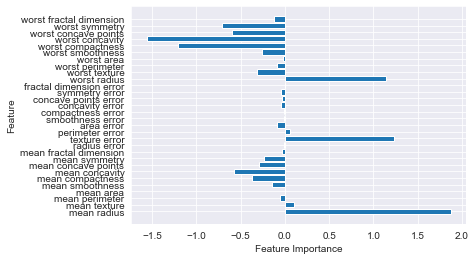

In [7]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), log_reg.coef_[0], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [8]:
#together with the intercept
k = X_train.shape[1]
#total number of observations
n = X_train.shape[0]
#degrees of freedom for the model:
df_model = k - 1
#degrees of freedom of the error:
df_error = n - k
print(' the number of parameters to estimate: {} \n total number of observations: {} \n degrees of freedom of the model: {} \n degrees of freedom of the errors: {}'\
      .format(k, n, df_model, df_error))

 the number of parameters to estimate: 30 
 total number of observations: 426 
 degrees of freedom of the model: 29 
 degrees of freedom of the errors: 396


In [9]:
#add the constant term to the data
X = sm.add_constant(X_train)
#define the model
model = sm.OLS(y_train, X)
#fit the model
results = model.fit()

In [10]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.767    
Dependent Variable: y                AIC:                -0.3320  
Date:               2019-07-26 12:00 BIC:                125.3556 
No. Observations:   426              Log-Likelihood:     31.166   
Df Model:           30               F-statistic:        47.73    
Df Residuals:       395              Prob (F-statistic): 3.90e-112
R-squared:          0.784            Scale:              0.054550 
--------------------------------------------------------------------
          Coef.     Std.Err.      t      P>|t|     [0.025     0.975]
--------------------------------------------------------------------
const      3.8053     0.5294    7.1886   0.0000     2.7646    4.8460
x1         0.2524     0.2006    1.2580   0.2091    -0.1420    0.6468
x2        -0.0083     0.0089   -0.9311   0.3524    -0.0257    0.0092
x3        -0.0385     0.0291   -1.3224   0.1868    -0.0957    0.0187
x4         0.0001     0.0006    0.1751   0.8611    -0.0011    0.0013
x5        -2.1171     2.3080   -0.9173   0.3595    -6.6546    2.4203
x6         6.0460     1.6428    3.6802   0.0003     2.8162    9.2758
x7        -1.3757     1.1786   -1.1673   0.2438    -3.6928    0.9413
x8        -0.8200     2.3402   -0.3504   0.7262    -5.4208    3.7808
x9        -0.5005     0.8568   -0.5842   0.5594    -2.1849    1.1838
x10       -7.7307     6.3578   -1.2159   0.2247   -20.2300    4.7686
x11       -0.6535     0.3523   -1.8546   0.0644    -1.3462    0.0392
x12       -0.0237     0.0410   -0.5788   0.5631    -0.1044    0.0569
x13        0.0619     0.0496    1.2490   0.2124    -0.0355    0.1593
x14       -0.0002     0.0018   -0.0876   0.9303    -0.0037    0.0034
x15      -18.7181     7.2611   -2.5779   0.0103   -32.9934   -4.4428
x16       -1.7424     2.4570   -0.7092   0.4786    -6.5728    3.0880
x17        4.0012     1.4780    2.7072   0.0071     1.0955    6.9070
x18      -10.9519     6.7761   -1.6162   0.1068   -24.2737    2.3699
x19        1.6453     3.0954    0.5315   0.5953    -4.4403    7.7309
x20       12.6612    13.0358    0.9713   0.3320   -12.9671   38.2894
x21       -0.1697     0.0652   -2.6045   0.0095    -0.2979   -0.0416
x22       -0.0041     0.0077   -0.5272   0.5983    -0.0193    0.0111
x23        0.0017     0.0066    0.2526   0.8007    -0.0113    0.0147
x24        0.0009     0.0004    2.6258   0.0090     0.0002    0.0017
x25        0.2240     1.5747    0.1422   0.8870    -2.8719    3.3198
x26       -0.2398     0.4404   -0.5444   0.5865    -1.1056    0.6261
x27       -0.4139     0.3034   -1.3643   0.1733    -1.0104    0.1826
x28       -1.1126     1.0658   -1.0439   0.2972    -3.2080    0.9827
x29       -0.7670     0.5649   -1.3578   0.1753    -1.8775    0.3435
x30       -2.8485     2.6368   -1.0803   0.2807    -8.0324    2.3353
------------------------------------------------------------------
Omnibus:              21.609       Durbin-Watson:          2.105  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       23.509 
Skew:                 -0.565       Prob(JB):               0.000  
Kurtosis:             3.222        Condition No.:          1492152
==================================================================
* The condition number is large (1e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

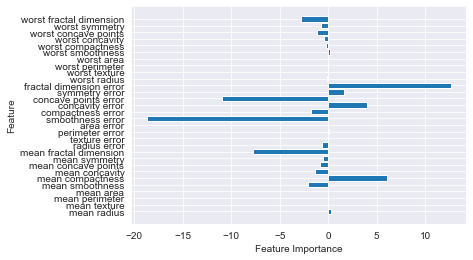

In [11]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), results.params[1:], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

## L1 Lasso regularisation:

In [12]:
log_reg = LogisticRegression(penalty='l1') # check the model params
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.960
Accuracy on the test set: 0.958


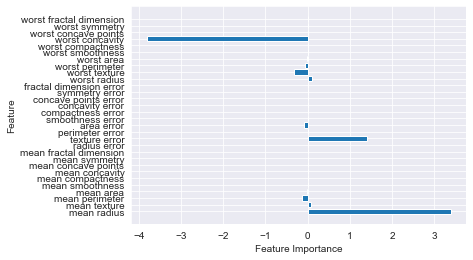

In [13]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), log_reg.coef_[0], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [14]:
len(log_reg.coef_[log_reg.coef_!=0])

11

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler() #StandardScaler(with_std=0.5)
X_train_sc=scaler.fit_transform(X_train)

In [16]:
X_train.max(), X_train.min()

(3432.0, 0.0)

In [17]:
X_train_sc.max(), X_train_sc.min()

(1.0, 0.0)

Accuracy on the training set: 0.953
Accuracy on the training set: 0.958


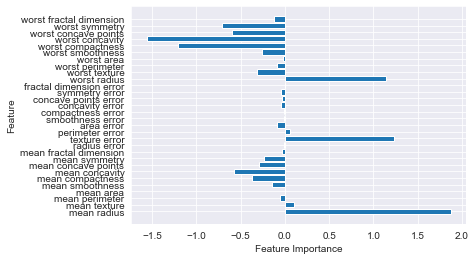

In [18]:
log_reg = LogisticRegression(penalty='l2') # check the model params
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), log_reg.coef_[0], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Accuracy on the training set: 0.927
Accuracy on the training set: 0.923


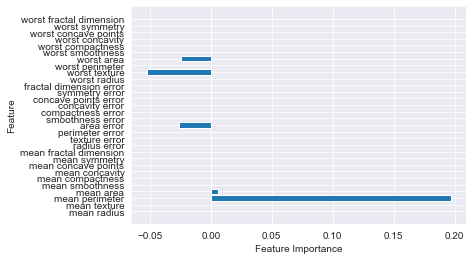

In [19]:
log_reg = LogisticRegression(penalty='l1', C=0.022) # check the model params
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), log_reg.coef_[0], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [20]:
len(log_reg.coef_[log_reg.coef_!=0])

5

## Elastic net (L1 & L2 regularisation):

In [21]:
results = model.fit_regularized() 

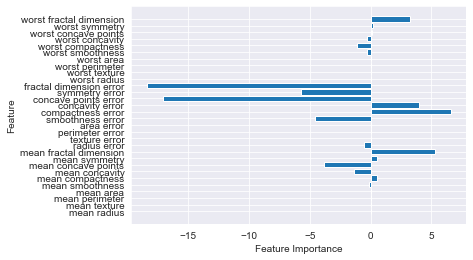

In [22]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), results.params[1:], align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [23]:
len(results.params)

31

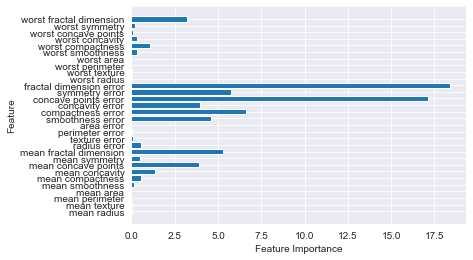

In [24]:
plt.barh(range(n_feature), abs(results.params[1:]), align='center') # to look at the coefs
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Вопросы:

- Помогла ли l1 жесткася регуляризация избежать переобучения?
- Переобучилась ли модель на нескольких характеристиках?
- Как это проверить?

## 2. k Nearest Neighbors



`Sklearn`:
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html'>Regressor</a>
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>Classifier</a>

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Тренируем

In [26]:
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


#######
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


In [27]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Метрики и ядерные функции:

### Метрики, реализованные в `sklearn`:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

### Специальные метрики для токенизации в пакете:
https://pypi.org/project/Distance/

### Или здесь:

http://www.nltk.org/_modules/nltk/align/bleu_score.html

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

Какая метрика стоит по дефолту?

In [79]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

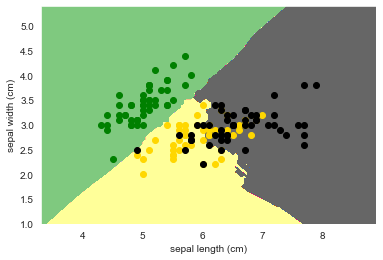

In [75]:
from sklearn.neighbors import KNeighborsClassifier

pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = KNeighborsClassifier(n_neighbors=30, 
                           metric='chebyshev', 
                           weights=gaussian_kernel,
                           p=2).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)

In [31]:
clf.score(X,y)

0.8133333333333334

## Levenstein distance

In [45]:
! pip install leven

  Stored in directory: /home/kate/.cache/pip/wheels/54/64/a5/439db671d666a50f3b3cebd2dcab3fbbab02785adf58e47552
Successfully built leven
You should consider upgrading via the 'pip install --upgrade pip' command.


In [47]:
from leven import levenshtein       
import numpy as np
from sklearn.cluster import dbscan
data = ["ACCTCCTAGAAG", "ACCTACTAGAAGTT", "GAATATTAGGCCGA"]
def lev_metric(x, y):
    i, j = int(x[0]), int(y[0])     # extract indices
    return levenshtein(data[i], data[j])

X = np.arange(len(data)).reshape(-1, 1)
dbscan(X, metric=lev_metric, eps=5, min_samples=2)

(array([0, 1]), array([ 0,  0, -1]))

Пример из: https://www.linkedin.com/pulse/measuring-text-similarity-python-ravi-shankar

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf = TfidfVectorizer()
string = 'This is a small sentence to show how text is converted to vector representation'
y = tfidf.fit_transform([string])
## convert to a sparse matrix form (not visible here but in large corpus will be)
## to know how these tfidf values are created, please google, this has
## two components - tf and idf
y.toarray()

array([[0.24253563, 0.24253563, 0.48507125, 0.24253563, 0.24253563,
        0.24253563, 0.24253563, 0.24253563, 0.24253563, 0.48507125,
        0.24253563]])

In [51]:
tfidf.vocabulary_

{'this': 8,
 'is': 2,
 'small': 6,
 'sentence': 4,
 'to': 9,
 'show': 5,
 'how': 1,
 'text': 7,
 'converted': 0,
 'vector': 10,
 'representation': 3}

In [52]:
## get the feature names with the correct indices
tfidf.get_feature_names()

['converted',
 'how',
 'is',
 'representation',
 'sentence',
 'show',
 'small',
 'text',
 'this',
 'to',
 'vector']

In [54]:
## convert the tfidf vector to a pandas dataframe
df = pd.DataFrame(y.toarray(), columns = tfidf.get_feature_names())

## print the dataframe
df

,converted,how,is,representation,sentence,show,small,text,this,to,vector
0,0.242536,0.242536,0.485071,0.242536,0.242536,0.242536,0.242536,0.242536,0.242536,0.485071,0.242536


In [63]:
# !pip install Distance

     |████████████████████████████████| 184kB 1.5MB/s eta 0:00:01
  Stored in directory: /home/kate/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built Distance
You should consider upgrading via the 'pip install --upgrade pip' command.


In [71]:
# !pip install nltk

You should consider upgrading via the 'pip install --upgrade pip' command.


In [66]:
import distance

In [67]:
print(distance.levenshtein("lenvestein", "levenshtein"))
print(distance.hamming("hamming", "hamning"))

3
1


In [68]:
t1 = ("de", "ci", "si", "ve")
t2 = ("de", "ri", "si", "ve")
distance.levenshtein(t1, t2)

1

In [70]:
string_1 = 'This is a small sentence to show how different this sentence is to the first one'
distance.levenshtein(string, string_1)

32

In [73]:
import nltk

hypothesis = ['It', 'is', 'a', 'cat', 'at', 'room']
reference = ['It', 'is', 'a', 'cat', 'inside', 'the', 'room']
#there may be several references
BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
print (BLEUscore)

0.4548019047027907


# KNN Regression:

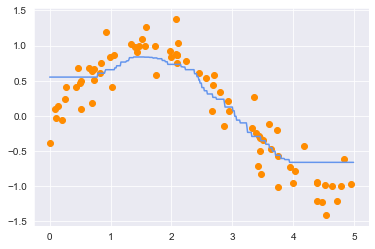

In [32]:
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# y = np.piecewise(X.flatten(), 
#                  [X.flatten() < 3, X.flatten() >= 3], [-1, 1]).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = KNeighborsRegressor(n_neighbors=30, 
                          metric='chebyshev', 
                          #weights=gaussian_kernel
                         ).fit(X, y)
y_ = clf.predict(X_test)
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

## Identifying Best Value Of k

In [33]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

In [34]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [36]:
# Create standardizer
standardizer = StandardScaler()

# Standardize features
X_std = standardizer.fit_transform(X)

In [37]:
# Fit a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1).fit(X_std, y)

In [38]:
# Create a pipeline
pipe = Pipeline([('standardizer', standardizer), ('knn', knn)])

# Create space of candidate values
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [39]:
# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_std, y)

In [40]:
# Best neighborhood size (k)
clf.best_estimator_.get_params()['knn__n_neighbors']

6

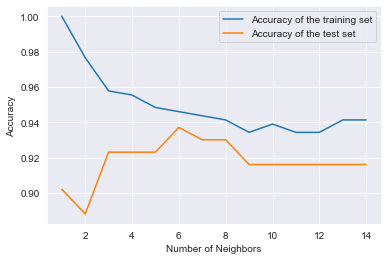

In [41]:
from sklearn.model_selection import train_test_split
#----------KNN Classifier 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

#by looking at plot, best result accurs when n_neighbors is 6

In [42]:
knn.score(X_test,y_test)

0.916083916083916

In [43]:
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=10, random_state=42)
X=cancer.data
y=cancer.target
i=0

for train_index, test_index in kfold.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Fold #', i)
    i+=1
    knn.fit(X_train,y_train)
    print(knn.score(X_test,y_test))
          

Fold # 0
0.896551724137931
Fold # 1
0.8620689655172413
Fold # 2
0.9122807017543859
Fold # 3
0.9649122807017544
Fold # 4
0.9649122807017544
Fold # 5
0.9298245614035088
Fold # 6
0.9649122807017544
Fold # 7
0.9464285714285714
Fold # 8
0.9107142857142857
Fold # 9
0.9464285714285714


## Унести домой: 
- kNN - очень популярный алгоритм в тех случаях, когда объекты сравнимы и имеет место "похожесть" объектов.
- kNN сильно зависит от метрики. А значит и от масштаба признаков. Перед применением нужно привести признаки к одной шкале
- kNN плохо воспринимает большое (>100) количество признаков, т.к. объекты оказываются одинаково отдалены друг от друга в таких пространствах 